In [19]:
import numpy as np


# 使用numpy的load函数读取数据
metrics = np.load('/data1/hhj/repo/Machine-Learning-Course-Project/Informer2020-main/results/informer_ETTh1_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_1/metrics.npy'
)
pred = np.load('/data1/hhj/repo/Machine-Learning-Course-Project/Informer2020-main/results/informer_ETTh1_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_1/pred.npy'
)
true = np.load('/data1/hhj/repo/Machine-Learning-Course-Project/Informer2020-main/results/informer_ETTh1_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_1/true.npy'
)


print(pred.shape)
print(true.shape)
# print(pred[0,0,:])
# print(true[0,0,:])



(2784, 96, 7)
(2784, 96, 7)


做一个关于OT的图
先分别对pred和true的OT做个图，观察走势像不像


看一看这个96到底是个什么东西，取两个相邻的96看看情况先

In [20]:
print(true[0,:10,6])
print(pred[1,:10,0])
print(pred[2,:10,0])

[-0.8623407  -0.86996883 -0.83161    -0.8775971  -0.915956   -0.8929624
 -0.9005906  -0.9005906  -0.8393472  -0.8393472 ]
[ 0.19598567  0.34063792  0.1603206   0.32622877  0.2835146   0.2574256
 -0.44801626 -2.348824   -2.6244013  -2.3889487 ]
[ 0.24157783  0.23801468 -0.12817746  0.145027    0.22745198  0.09805492
 -1.0638349  -2.6304553  -2.665099   -2.2702894 ]


In [21]:
true_OT_base = true[0,:96,0]
true_OT_base = true_OT_base.tolist()

true_OT_96 = true[96,:,0]
true_OT_96 = true_OT_96.tolist()
true_OT_96 = true_OT_base+true_OT_96


pred_OT_96 = pred[96,:,0]
pred_OT_96 = pred_OT_96.tolist()
pred_OT_96 = true_OT_base+pred_OT_96

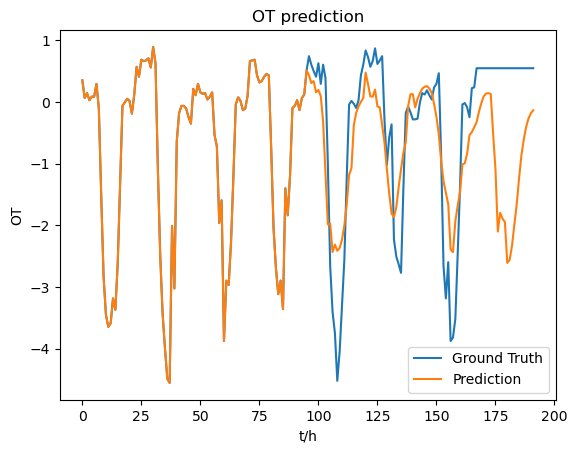

In [22]:
import matplotlib.pyplot as plt

plt.plot(true_OT_96, label='Ground Truth')
plt.plot(pred_OT_96, label='Prediction')
plt.xlabel('t/h')  # 可以添加X轴标签
plt.ylabel('OT')  # 可以添加Y轴标签
plt.title('OT prediction')  # 可以添加标题
plt.legend()
plt.show()

已经探索出的点：
- true的结构 每96个是上一个96个的后移一位
- 结果都是1以内的小数，可能是经过了某种归一化函数
疑惑的点：
- pred在96位时的后96结果与true相差过大，且是恒定的大
- 实际参与训练的数据智能占到原数据集的0.8倍

可以尝试的点
- 看看pred在0后的96位于true的结果比较
- 去代码中找到这个归一化函数，做出一个逆函数来还原
- 把数据集替换掉，看看代码能不能跑通，不能则说明确实是这个数据集，问题在于读数据的函数

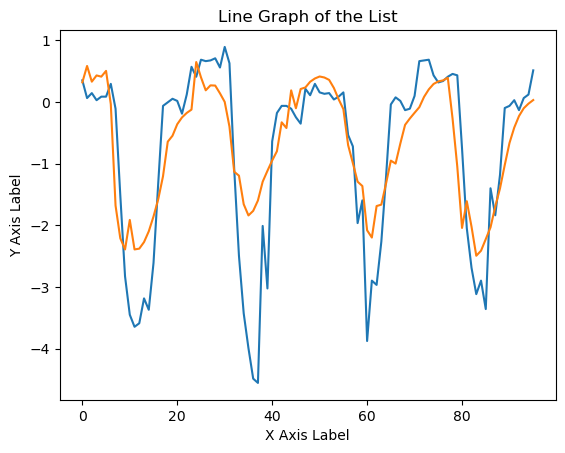

In [23]:
true_OT_0 = true[0,:,0]
true_OT_0 = true_OT_0.tolist()


pred_OT_0 = pred[0,:,0]
pred_OT_0 = pred_OT_0.tolist()

import matplotlib.pyplot as plt

plt.plot(true_OT_0, label='true')
plt.plot(pred_OT_0, label='pred')
plt.xlabel('X Axis Label')  # 可以添加X轴标签
plt.ylabel('Y Axis Label')  # 可以添加Y轴标签
plt.title('Line Graph of the List')  # 可以添加标题
plt.show()


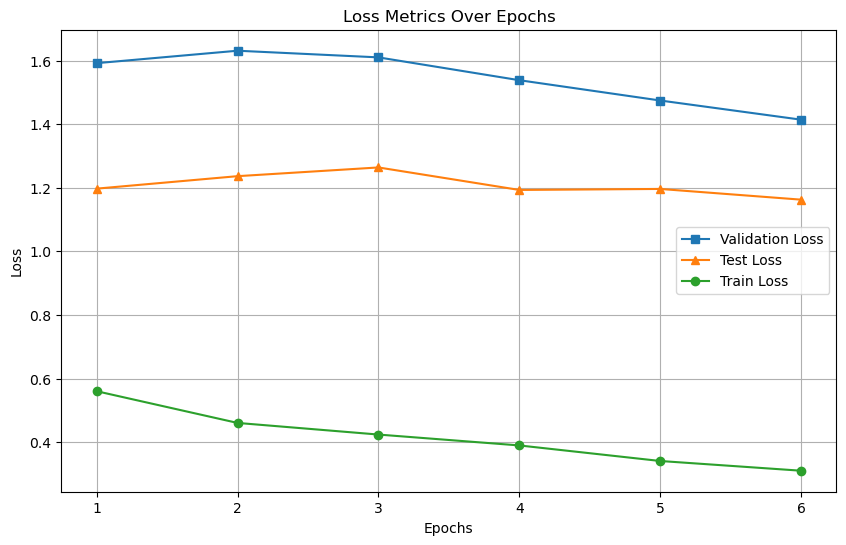

In [24]:
# loss随epoch变化的曲线

import matplotlib.pyplot as plt

# 96 to 336
# Loss values for each epoch
train_loss = [0.5600566, 0.4602301, 0.4236457, 0.3894206, 0.3404690, 0.3098720]
vali_loss = [1.5921177, 1.6312586, 1.6103250, 1.5384804, 1.4745985, 1.4142905]
test_loss = [1.1973350, 1.2365932, 1.2640125, 1.1932236, 1.1963747, 1.1626827]

# Epochs
epochs = list(range(1, len(train_loss) + 1))

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, vali_loss, label='Validation Loss', marker='s') 
plt.plot(epochs, test_loss, label='Test Loss', marker='^')
plt.plot(epochs, train_loss, label='Train Loss', marker='o')

# Adding titles and labels
plt.title('Loss Metrics Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


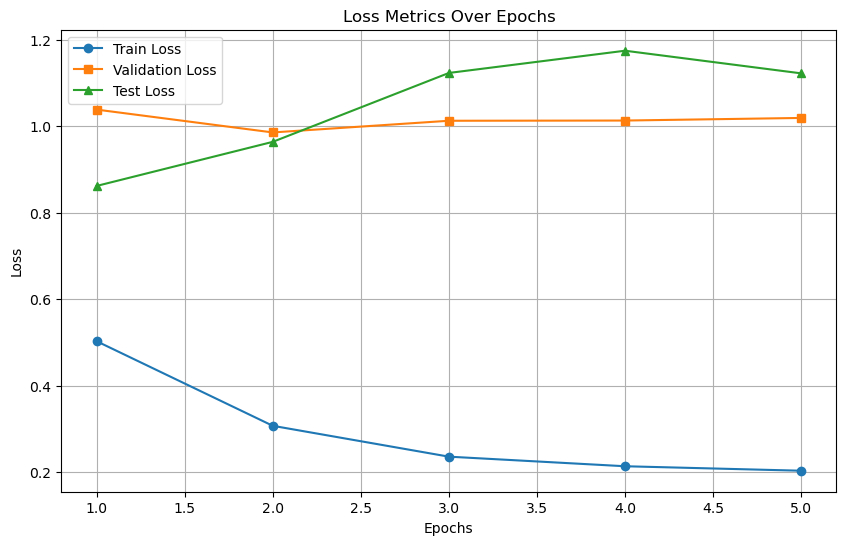

In [1]:
import matplotlib.pyplot as plt

# Updated loss values for each epoch
train_loss = [0.5031855, 0.3076443, 0.2363092, 0.2141605, 0.2038046]
vali_loss = [1.0386736, 0.9858685, 1.0128722, 1.0133662, 1.0193892]
test_loss = [0.8621753, 0.9641168, 1.1234000, 1.1747863, 1.1224689]

# Epochs
epochs = list(range(1, len(train_loss) + 1))

# Creating the plot with the updated data
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, vali_loss, label='Validation Loss', marker='s')
plt.plot(epochs, test_loss, label='Test Loss', marker='^')

# Adding titles, labels, and legend
plt.title('Loss Metrics Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
